In [821]:
# Define mappings for bedrooms, bathrooms, and square footage
bedroom_hours = {
    0: 0.5, 0.5: 0.5, 1: 0.5, 1.5: 0.75, 2: 1, 2.5: 1.25,
    3: 1.5, 3.5: 1.75, 4: 2, 4.5: 2.25, 5: 2.5, 5.5: 2.75,
    6: 3, 6.5: 3.25, 7: 3.5, 7.5: 3.75, 8: 4, 8.5: 4.25,
    9: 4.5, 9.5: 4.75, 10: 5, 10.5: 5.25, 11: 5.5, 11.5: 5.75,
    12: 6, 12.5: 6.25, 13: 6.5, 13.5: 6.75, 14: 7, 14.5: 7.25,
    15: 7.5, 15.5: 7.75, 16: 8, 16.5: 8.25, 17: 8.5, 17.5: 8.75,
    18: 9, 18.5: 9.25, 19: 9.5, 19.5: 9.75, 20: 10, 20.5: 10.25,
    21: 10.5
}

bathroom_hours = {
    1: 0.5, 1.5: 0.75, 2: 1, 2.5: 1.25, 3: 1.5, 3.5: 1.75,
    4: 2, 4.5: 2.25, 5: 2.5, 5.5: 2.75, 6: 3, 6.5: 3.25,
    7: 3.5, 7.5: 3.75, 8: 4, 8.5: 4.25, 9: 4.5, 9.5: 4.75,
    10: 5, 10.5: 5.25, 11: 5.5, 11.5: 5.75, 12: 6}


# Define multipliers for different job types
job_type_multipliers = {
    "standard_clean": 1,
    "deep_clean": 1.8,

}# Define multipliers for house types
house_type_multipliers = {
    "Condo/Townhouse": 1,
    "Detached": 1.1
}

service_level_rates = {
    "economy": 27,
    "standard": 30,
    "premium": 37
}

# Function to calculate total cleaning price with house and job type multipliers
import math

def calculate_cleaning_price_with_house_type(
    bedrooms, bathrooms, job_type, house_type, service_level
):
    # Get hours from mappings
    bedroom_time = bedroom_hours.get(bedrooms, 0)
    bathroom_time = bathroom_hours.get(bathrooms, 0)

    # Base time
    total_time = bedroom_time + bathroom_time

    # Apply multipliers
    job_multiplier = job_type_multipliers.get(job_type, 1)
    house_multiplier = house_type_multipliers.get(house_type, 1)

    adjusted_time = total_time * job_multiplier * house_multiplier

    # Enforce minimum time of 2.5 hours
    adjusted_time = max(2.5, round(adjusted_time, 2))

    # Validate service level
    if service_level not in service_level_rates:
        raise ValueError(f"Invalid service level: '{service_level}'. Must be one of: {list(service_level_rates.keys())}")

    hourly_rate = service_level_rates[service_level]

    # 🕒 Round UP to nearest 0.5 (no extra 0.5 added)
    rounded_time = math.ceil(adjusted_time * 2) / 2
    next_half = rounded_time + 0.5

    # Format time range
    time_range_str = f"{rounded_time:.1f}–{next_half:.1f} hrs"

    # 💰 Price range
    price_range_start = round(rounded_time * hourly_rate, 2)
    price_range_end = round(next_half * hourly_rate, 2)
    price_range_str = f"${price_range_start:.2f}–${price_range_end:.2f}"

    return {
        "time_range": time_range_str,
        "price_range": price_range_str,
        "adjusted_time": round(adjusted_time, 2),
        "base_price": round(adjusted_time * hourly_rate, 2)
    }


result = calculate_cleaning_price_with_house_type(
    bedrooms=3,
    bathrooms=2.5,
    job_type="deep_clean",
    house_type="Detached",
    service_level="standard"
)

print("Estimated Time Range:", result["time_range"])
print("Estimated Price Range:", result["price_range"])


Estimated Time Range: 5.5–6.0 hrs
Estimated Price Range: $165.00–$180.00


In [822]:
import random
import numpy as np
import pandas as pd

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Service level rates (required for validation)
service_level_rates = {
    "economy": 27,
    "standard": 30,
    "premium": 37
}

# Generate realistic combinations including service level
def generate_realistic_data(num_records=10000):
    data = []
    for _ in range(num_records):
        # 🔁 Bedrooms: 1 to 10
        bedrooms = random.randint(1, 10)

        # 🔁 Bathrooms: ±0 to 2 from bedrooms (e.g., 5 beds → 5–7 baths)
        possible_bathroom_steps = [0, 0.5, 1, 1.5, 2]
        base_bathrooms = bedrooms
        bathrooms = base_bathrooms + random.choice(possible_bathroom_steps)
        bathrooms = min(bathrooms, 10)  # Cap bathrooms at 10 max

        # 🔁 Job type, house type, service level
        job_type = random.choice(["standard_clean", "deep_clean"])
        house_type = random.choice(["Condo/Townhouse", "Detached"])
        service_level = random.choice(list(service_level_rates.keys()))

        try:
            # Calculate estimated time and price
            result = calculate_cleaning_price_with_house_type(
                bedrooms=bedrooms,
                bathrooms=bathrooms,
                job_type=job_type,
                house_type=house_type,
                service_level=service_level
            )

            data.append({
                "bedrooms": bedrooms,
                "bathrooms": bathrooms,
                "job_type": job_type,
                "house_type": house_type,
                "service_level": service_level,
                "adjusted_time": result["adjusted_time"],
                "base_price": result["base_price"],
                "time_range": result["time_range"],
                "price_range": result["price_range"]
            })

        except Exception as e:
            # Optional: log or skip bad combinations
            print(f"Skipped invalid record due to error: {e}")

    return data


# Generate and convert to DataFrame
generated_data = generate_realistic_data(10000)
df = pd.DataFrame(generated_data)
df.head()


,bedrooms,bathrooms,job_type,house_type,service_level,adjusted_time,base_price,time_range,price_range
0,2,2.0,deep_clean,Condo/Townhouse,economy,3.6,97.2,4.0–4.5 hrs,$108.00–$121.50
1,3,3.0,standard_clean,Detached,economy,3.3,89.1,3.5–4.0 hrs,$94.50–$108.00
2,1,1.0,standard_clean,Condo/Townhouse,premium,2.5,92.5,2.5–3.0 hrs,$92.50–$111.00
3,10,10.0,standard_clean,Detached,economy,11.0,297.0,11.0–11.5 hrs,$297.00–$310.50
4,8,10.0,deep_clean,Condo/Townhouse,economy,16.2,437.4,16.5–17.0 hrs,$445.50–$459.00


In [823]:
# Good score RF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare data
df.drop(columns=["base_price"], inplace=True)
X = pd.get_dummies(
    df.drop(columns=[
        "adjusted_time",       # 🎯 This is the target (y)
        "time_range",          # ❌ Derived from adjusted_time
        "price_range"          # ❌ Derived from adjusted_time and service_level
    ]),
    drop_first=True
)

y = df["adjusted_time"] + np.random.normal(0, 0.05, size=len(df))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define param grid
param_dist = {
    'n_estimators': [5,7,9],              # VERY few trees
    'max_depth': [3, 4],              # Keep trees shallow
    'min_samples_split': [30, 40],       # Fewer splits
    'min_samples_leaf': [15, 20, 25],    # Larger leaves
    'max_features': [0.1, 0.2]           # Less info per tree
}

# Model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # number of sampled combinations
    cv=3,       # faster than cv=5
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

# Predict and evaluate
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

# Output
print("Best Parameters:", random_search.best_params_)
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"✅ CV R²: {mean_cv_r2:.4f} ± {std_cv_r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 9, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 0.2, 'max_depth': 4}
Train R²: 0.9347
Test R²: 0.9350
✅ CV R²: 0.9344 ± 0.0029
MAE: 1.01
MSE: 1.59


In [824]:
cv_results = pd.DataFrame(random_search.cv_results_)
cv_results[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.826260,0.005093,"{'n_estimators': 7, 'min_samples_split': 40, '..."
1,0.934707,0.001255,"{'n_estimators': 9, 'min_samples_split': 30, '..."
2,0.840963,0.003149,"{'n_estimators': 5, 'min_samples_split': 30, '..."
3,0.840963,0.003149,"{'n_estimators': 5, 'min_samples_split': 30, '..."
4,0.826260,0.005093,"{'n_estimators': 7, 'min_samples_split': 40, '..."


In [825]:
import pandas as pd
import numpy as np
import math
import joblib

# Load the trained model
# best_model = joblib.load("cleaning_time_predictor.pkl")

# Hourly rates by service level
service_level_rates = {
    "economy": 27,
    "standard": 30,
    "premium": 37
}

# Input: new unseen example
new_input = {
    "bedrooms": 3,
    "bathrooms": 2.5,
    "job_type": "deep_clean",
    "house_type": "Detached",
    "service_level": "standard"
}

# Step 1: Convert input to DataFrame
new_data = pd.DataFrame([new_input])

# Step 2: Encode to match model features
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=best_model.feature_names_in_, fill_value=0)

# Step 3: Predict adjusted time
predicted_time = best_model.predict(new_data_encoded)[0]

# Step 4: Round up to next whole number
rounded_time = math.ceil(predicted_time)
time_range_str = f"{rounded_time}–{rounded_time + 0.5} hrs"

# Step 5: Calculate price range
hourly_rate = service_level_rates[new_input["service_level"]]
price_range_start = round(rounded_time * hourly_rate, 2)
price_range_end = round((rounded_time + 0.5) * hourly_rate, 2)
price_range_str = f"${price_range_start:.2f}–${price_range_end:.2f}"

# 🟢 Output
print(f"🕒 Predicted Adjusted Time: {predicted_time:.2f} hrs")
print(f"🕒 Estimated Time Range: {time_range_str}")
print(f"💰 Estimated Price Range: {price_range_str}")


🕒 Predicted Adjusted Time: 5.86 hrs
🕒 Estimated Time Range: 6–6.5 hrs
💰 Estimated Price Range: $180.00–$195.00


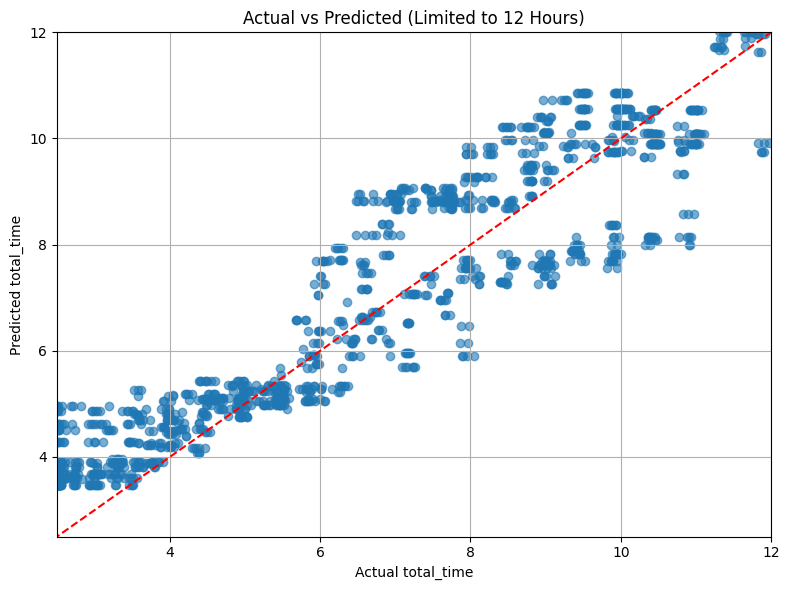

In [826]:
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 12], [0, 12], 'r--')  # Diagonal line capped at 12
plt.xlim(2.5, 12)  # Limit x-axis to 12
plt.ylim(2.5, 12)  # Limit y-axis to 12
plt.xlabel("Actual total_time")
plt.ylabel("Predicted total_time")
plt.title("Actual vs Predicted (Limited to 12 Hours)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# #Execute this code to download the file as .pkl(pickle file)
# import pickle

# # Save model to file
# with open("cleaning_time_predictor.pkl", "wb") as f:
#     pickle.dump(best_model, f)

# from google.colab import files
# files.download("cleaning_time_predictor.pkl")